# Topic Modeling using LDA

### References

* Data: ABC News Headlines (https://www.kaggle.com/therohk/million-headlines/version/6)
* Preprocess: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* LDA: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/07/09/lda/

### Load Raw Data

In [ ]:
import urllib
url = 'https://storage.googleapis.com/kaggle-datasets/1692/11834/million-headlines.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1542521494&Signature=hxTrdTbP%2F%2FK%2Fxlo55hVfABMRP%2FdLS99NJs4azw8qq%2F1flZdsQWSUZHSS2nEIg%2BgQhMcJytaTjtNIUkBkff4p%2B41ppQpv34Ldu%2Fq8QCPxWmJ01W%2BQMhNN4X2oTcCnbfHWNXr1mTxpCXsjmnncFC6keacOYq4qqGqR%2BlnbPIL2RT3dRdqD5PjgPuzyALxHjJNOhhgLp0QI1rpVuAHSzF1AF%2FRagWSGJM0e95DXZcRhSU7Fds2mu6itVdRBd4CUrIQAko7jF%2BvlDPXbXU%2F6GiTKvghZfmDwAlV3Wa%2FGCLCuumPyfSQkDYebvvI004cSkcewvqKxCLjwAJSTRI5DjX%2B%2BZA%3D%3D'

urllib.request.urlretrieve(url, './data.zip')

import zipfile
         
data_zip = zipfile.ZipFile('./data.zip')
data_zip.extractall('./')
 
data_zip.close()

import os

os.remove('./data.zip')

In [21]:
import pandas as pd
news_data = pd.read_csv('./abcnews-date-text.csv')

In [22]:
news_data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


#### Extract target data

In [23]:
data_text = news_data[['headline_text']]
data_text['index'] = news_data.index
documents = data_text
documents.head()

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


### Preprocessing

* Import Libraries

In [ ]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org gensim

In [ ]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org nltk

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

* Preprocess
 1. simple_preprocess: Split Text by whitespace
 2. STOPWORDS: Remove stopwords
 3. lemmatize_stemming
 
* lemmatize_stemming
 - Lemmatizing & Stemming Replace word with original form
 - Lemmatizing consider whether the word exist in the real world
 - pos means a position of the word
 - https://m.blog.naver.com/PostView.nhn?blogId=vangarang&logNo=220963244354&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [20]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

* Test

In [ ]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')

words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

* Run

In [ ]:
%time processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

----

### T-SNE

* https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
* https://lumiamitie.github.io/r/python/tsne-for-r-py/

In [9]:
### TSNE모델에는 transform 메소드가 없고 fit_transform만 있음
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

np.random.seed(2018)

In [ ]:
type(documents['headline_text'].values.tolist())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
%time vect.fit(documents['headline_text'].values.tolist())
vect.vocabulary_

In [ ]:
%time tsne_data = vect.transform(documents['headline_text'].values.tolist()).toarray()

In [ ]:
tsne_data[:10]

In [ ]:
%time tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(np.array(tsne_data))

In [3]:
# t-SNE 모델 생성 및 학습
tsne = TSNE(random_state=0)
tsne.fit_transform(tsne_data)

NameError: name 'tsne_data' is not defined

In [14]:
# iris 데이터
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# iris 데이터를 matrix로 변환시킨 후 t-SNE 적용
iris_matrix = iris.iloc[:, 0:4].values
# iris_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(iris_matrix)
iris_matrix[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

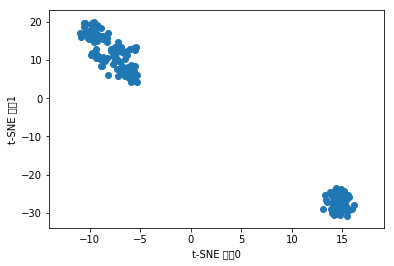

In [19]:
# t-SNE 모델 생성 및 학습
tsne = TSNE(learning_rate=300, init='pca')
digits_tsne = tsne.fit_transform(iris_matrix)

# 시각화
plt.scatter(digits_tsne[:, 1], digits_tsne[:, 0])
plt.xlim(digits_tsne[:, 1].min()-3, digits_tsne[:, 1].max()+3) # 최소, 최대
plt.ylim(digits_tsne[:, 0].min()-3, digits_tsne[:, 0].max()+3) # 최소, 최대
plt.xlabel('t-SNE 특성0') # x축 이름
plt.ylabel('t-SNE 특성1') # y축 이름
plt.show() # 그래프 출력

----

### Topic Modeling

* Setting Variables

    1. document_topic_counts : List of Counter (len = count of documents)
    2. topic_word_counts : List of Counter (len = count of topic)
    3. topic_counts : List of Integer (len = count of topic)
    4. document_lengths : List of length of documents
    5. distinct_words: All unique words in dataset
    6. V: length of distinct words
    7. D: length of documents
    
* Counter Object
 - Calculate count of elements

In [ ]:
from collections import Counter

def get_variables(K):
    # 사용자가 원하는 토픽의 갯수
    K = 10

    # 각 토픽이 각 문서에 할당되는 횟수
    # Counter로 구성된 리스트
    # 각 Counter는 각 문서를 의미
    document_topic_counts = [Counter() for _ in processed_docs]

    # 각 단어가 각 토픽에 할당되는 횟수
    # Counter로 구성된 리스트
    # 각 Counter는 각 토픽을 의미
    topic_word_counts = [Counter() for _ in range(K)]

    # 각 토픽에 할당되는 총 단어수
    # 숫자로 구성된 리스트
    # 각각의 숫자는 각 토픽을 의미함
    topic_counts = [0 for _ in range(K)]

    # 각 문서에 포함되는 총 단어수
    # 숫자로 구성된 리스트
    # 각각의 숫자는 각 문서를 의미함
    document_lengths = list(map(len, processed_docs))

    # 단어 종류의 수
    distinct_words = set(word for document in processed_docs for word in document)
    V = len(distinct_words)

    # 총 문서의 수
    D = len(processed_docs)

    return V, D, document_topic_counts, topic_word_counts, topic_counts, document_lengths, distinct_words

In [ ]:
def p_topic_given_document(topic, d, alpha=0.1):
    # 문서 d의 모든 단어 가운데 topic에 속하는
    # 단어의 비율 (alpha를 더해 smoothing)
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    # topic에 속한 단어 가운데 word의 비율
    # (beta를 더해 smoothing)
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    # 문서와 문서의 단어가 주어지면
    # k번째 토픽의 weight를 반환
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [ ]:
def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

import random
def sample_from(weights):
    # i를 weights[i] / sum(weights)
    # 확률로 반환
    total = sum(weights)
    # 0과 total 사이를 균일하게 선택
    rnd = total * random.random()
    # 아래 식을 만족하는 가장 작은 i를 반환
    # weights[0] + ... + weights[i] >= rnd
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i

* Run
 - Initialize Topic using random value by word in documents
 - Calculate variables
    1. document_topic_counts
        - count of topic word in every document
        - 개별 문서에서 topic word의 등장 횟수
    2. topic_word_counts
        - appearance count of words in whole documents
        - every word seperate by topic
        - 개별 Topic에서 topic word의 등장 횟수(전체 문서 기준)

In [ ]:
random.seed(0)

K = 10
V, D, document_topic_counts, topic_word_counts, topic_counts, document_lengths, distinct_words = get_variables(K)

# 각 단어를 임의의 토픽에 랜덤 배정
document_topics = [[random.randrange(K) for word in document] for document in processed_docs]

# 위와 같이 랜덤 초기화한 상태에서 
# AB를 구하는 데 필요한 숫자를 세어봄
for d in range(D):
    for word, topic in zip(processed_docs[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [ ]:
len(processed_docs)

----

In [ ]:
import time
start_time = time.time() 

for iter in range(10):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(processed_docs[d], document_topics[d])):
            # 깁스 샘플링 수행을 위해
            # 샘플링 대상 word와 topic을 제외하고 세어봄
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # 깁스 샘플링 대상 word와 topic을 제외한 
            # 말뭉치 모든 word의 topic 정보를 토대로
            # 샘플링 대상 word의 새로운 topic을 선택
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # 샘플링 대상 word의 새로운 topic을 반영해 
            # 말뭉치 정보 업데이트
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1
    
    print("--- %d iter: %s mins ---" % (iter, str((time.time() - start_time) / 60.)))

print("--- %s mins ---" % str((time.time() - start_time) / 60.))

In [ ]:
## i번째 document의 topic 비중
document_topic_counts[0]

In [ ]:
## i번째 topic의 단어 비중
for i in range(10):
    print('Topic %d: %s' % (i, ','.join(['%s(%s)' % (a, b)for a, b in topic_word_counts[i].most_common(10)])))

* 깁스 샘플링(Gibbs Sampling) 
* http://4four.us/article/2014/10/lda-parameter-estimation
* https://bab2min.tistory.com/569

In [ ]:
# document_topic_counts: 개별 문서에서 topic word의 등장 횟수
# topic_word_counts: 개별 Topic에서 topic word의 등장 횟수(전체 문서 기준)
# K=Topic의 수, V=unique word의 수

# 문서 내에서 단어가 해당하는 topic의 비율 
# (문서 내 대상 topic 단어의 수 + alpha) / (문서 전체 단어 수 + (K * alpah))
def p_topic_given_document(topic, d, alpha=0.1):
    # 문서 d의 모든 단어 가운데 topic에 속하는
    # 단어의 비율 (alpha를 더해 smoothing)
    return ((document_topic_counts[d][topic] + alpha) / (document_lengths[d] + K * alpha))

# Topic 내에서 대상 단어의 비율
# (Topic 내 단어들의 수 + beta) / (Topic 전체 단어 수 + (V * beta))
def p_word_given_topic(word, topic, beta=0.1):
    # topic에 속한 단어 가운데 word의 비율
    # (beta를 더해 smoothing)
    return ((topic_word_counts[topic][word] + beta) / (topic_counts[topic] + V * beta))

# 문서 내의 특정 단어가 특정 Topic일 확률
def topic_weight(d, word, k):
    # 문서와 문서의 단어가 주어지면
    # k번째 토픽의 weight를 반환
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

# d: document index
# word: 제외된 word
# K: topic의 수

# 모든 Topic에 대해서 주어진 문서 내에서 주어진 단어가 해당 Topic일 확률을 계산
# 그 중 확률이 가장 
def choose_new_topic(d, word):
    return np.argmin(sample_from([topic_weight(d, word, k) for k in range(K)]))

import random
def sample_from(weights):
    # i를 weights[i] / sum(weights)
    # 확률로 반환
    total = sum(weights)
    # 0과 total 사이를 균일하게 선택
    rnd = total * random.random()
    # 아래 식을 만족하는 가장 작은 i를 반환
    # weights[0] + ... + weights[i] >= rnd
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0:
            return i

----